Is there a gender gap in salary?

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Cleaned_Combined_Kaggle_Data.csv')
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [14]:
X = df[['Age','Gender', 'Years_Coding','Salary']]
X

,Age,Gender,Years_Coding,Salary
0,23.0,Male,2.0,34999.5
1,42.0,Male,0.0,6249.5
2,42.0,Male,2.0,274999.5
3,52.0,Male,20.0,64999.5
4,23.0,Male,5.0,12499.5
...,...,...,...,...
26166,64.5,Male,20.0,64999.5
26167,23.0,Male,2.0,12499.5
26168,27.0,Male,10.0,8749.5
26169,37.0,Male,2.0,2499.5


In [15]:
encoder = OrdinalEncoder()
gender = [['Male', 0],
          '[Female', 1]

In [16]:
encoded_gender = encoder.fit_transform(X[['Gender']])

In [17]:
X['Gender']=encoded_gender
X.head()

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Gender,Years_Coding,Salary
0,23.0,1.0,2.0,34999.5
1,42.0,1.0,0.0,6249.5
2,42.0,1.0,2.0,274999.5
3,52.0,1.0,20.0,64999.5
4,23.0,1.0,5.0,12499.5


In [18]:
mean_salary = X['Salary'].mean()
mean_salary

57489.22482900921

In [19]:
X.loc[df['Salary'] >= mean_salary, 'Salary'] = 1
X.loc[df['Salary'] <= mean_salary, 'Salary'] = 0
X

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,Age,Gender,Years_Coding,Salary
0,23.0,1.0,2.0,0.0
1,42.0,1.0,0.0,0.0
2,42.0,1.0,2.0,1.0
3,52.0,1.0,20.0,1.0
4,23.0,1.0,5.0,0.0
...,...,...,...,...
26166,64.5,1.0,20.0,1.0
26167,23.0,1.0,2.0,0.0
26168,27.0,1.0,10.0,0.0
26169,37.0,1.0,2.0,0.0


In [20]:
y = X['Salary']
y

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
26166    1.0
26167    0.0
26168    0.0
26169    0.0
26170    0.0
Name: Salary, Length: 26171, dtype: float64

In [22]:
X = X[['Age','Gender', 'Years_Coding']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1, stratify=y)

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [26]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3595,  563],
       [1498,  887]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

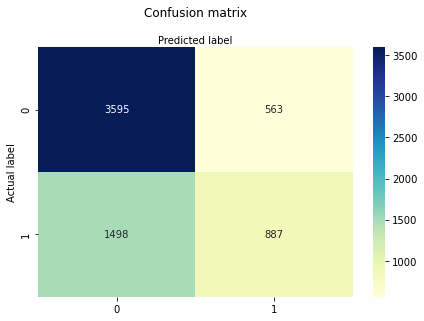

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6850068775790922
Precision: 0.6117241379310345
Recall: 0.3719077568134172


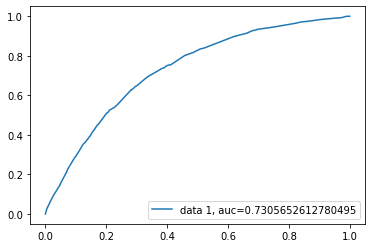

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()